## Assignment 1: Machine Learning Methods

### \<your name> \<your id>

#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad). 
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

data visualization: explain what you visualize, explain your charts and plots and what you see in the trend

### 1. Read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("ObesityDataSet.csv")
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

### 2. Analyse and visualise the data

In [1]:
print(data.head())
print(data.describe())
sns.pairplot(data)
plt.show()


NameError: name 'data' is not defined

### 3. Organise the data for modelling

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

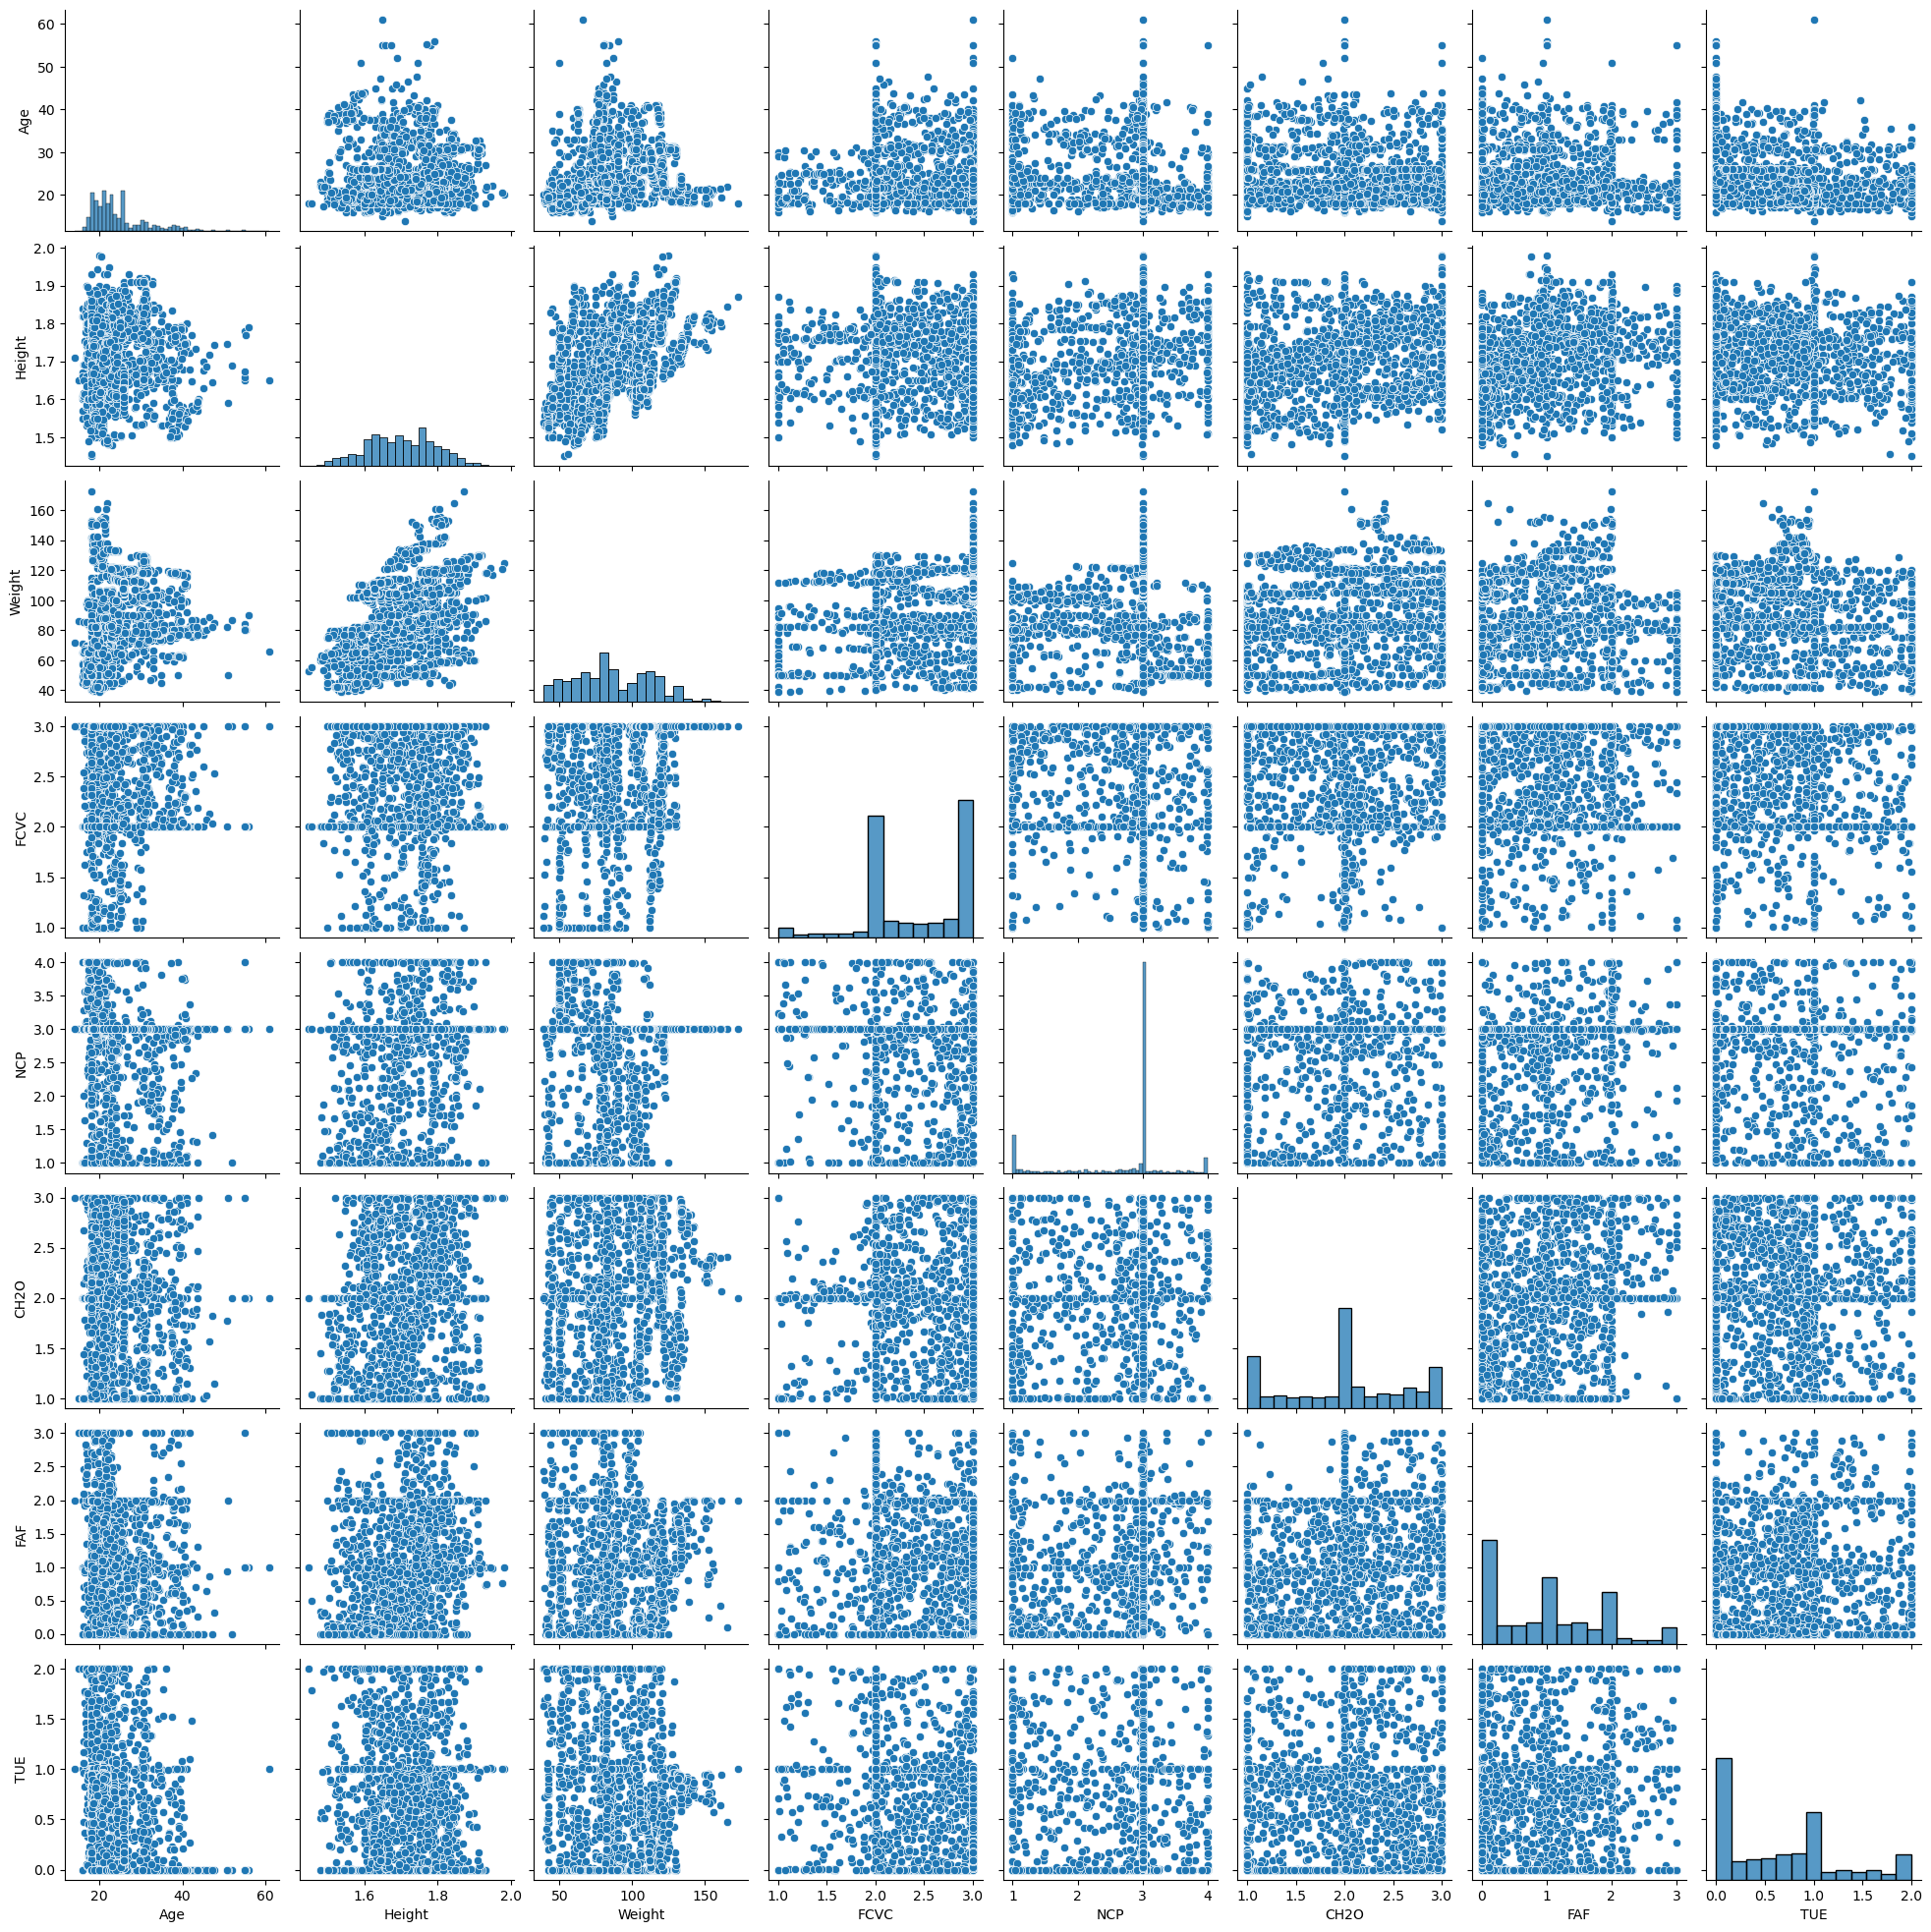

Confusion Matrix for Logistic Regression:
[[56  0  0  0  0  0  0]
 [ 9 39  0  0  0 11  3]
 [ 0  0 69  7  0  0  2]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 41 10]
 [ 0  0  3  0  0  5 42]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        56
           1       0.89      0.63      0.74        62
           2       0.93      0.88      0.91        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.72      0.73      0.73        56
           6       0.74      0.84      0.79        50

    accuracy                           0.87       423
   macro avg       0.86      0.86      0.86       423
weighted avg       0.87      0.87      0.86       423



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("ObesityDataSet.csv")
data.head()
print(data.head())
print(data.describe())
sns.pairplot(data)
plt.show()
data['NObeyesdad'] = data['NObeyesdad'].astype('category').cat.codes
X = pd.get_dummies(data.drop('NObeyesdad', axis=1))
y = data['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)


y_pred_logistic = logistic_model.predict(X_test_scaled)

print("Confusion Matrix for Logistic Regression:")
print(metrics.confusion_matrix(y_test, y_pred_logistic))  
print("\nClassification Report for Logistic Regression:")
print(metrics.classification_report(y_test, y_pred_logistic))  


### 4. Implement prediction models

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

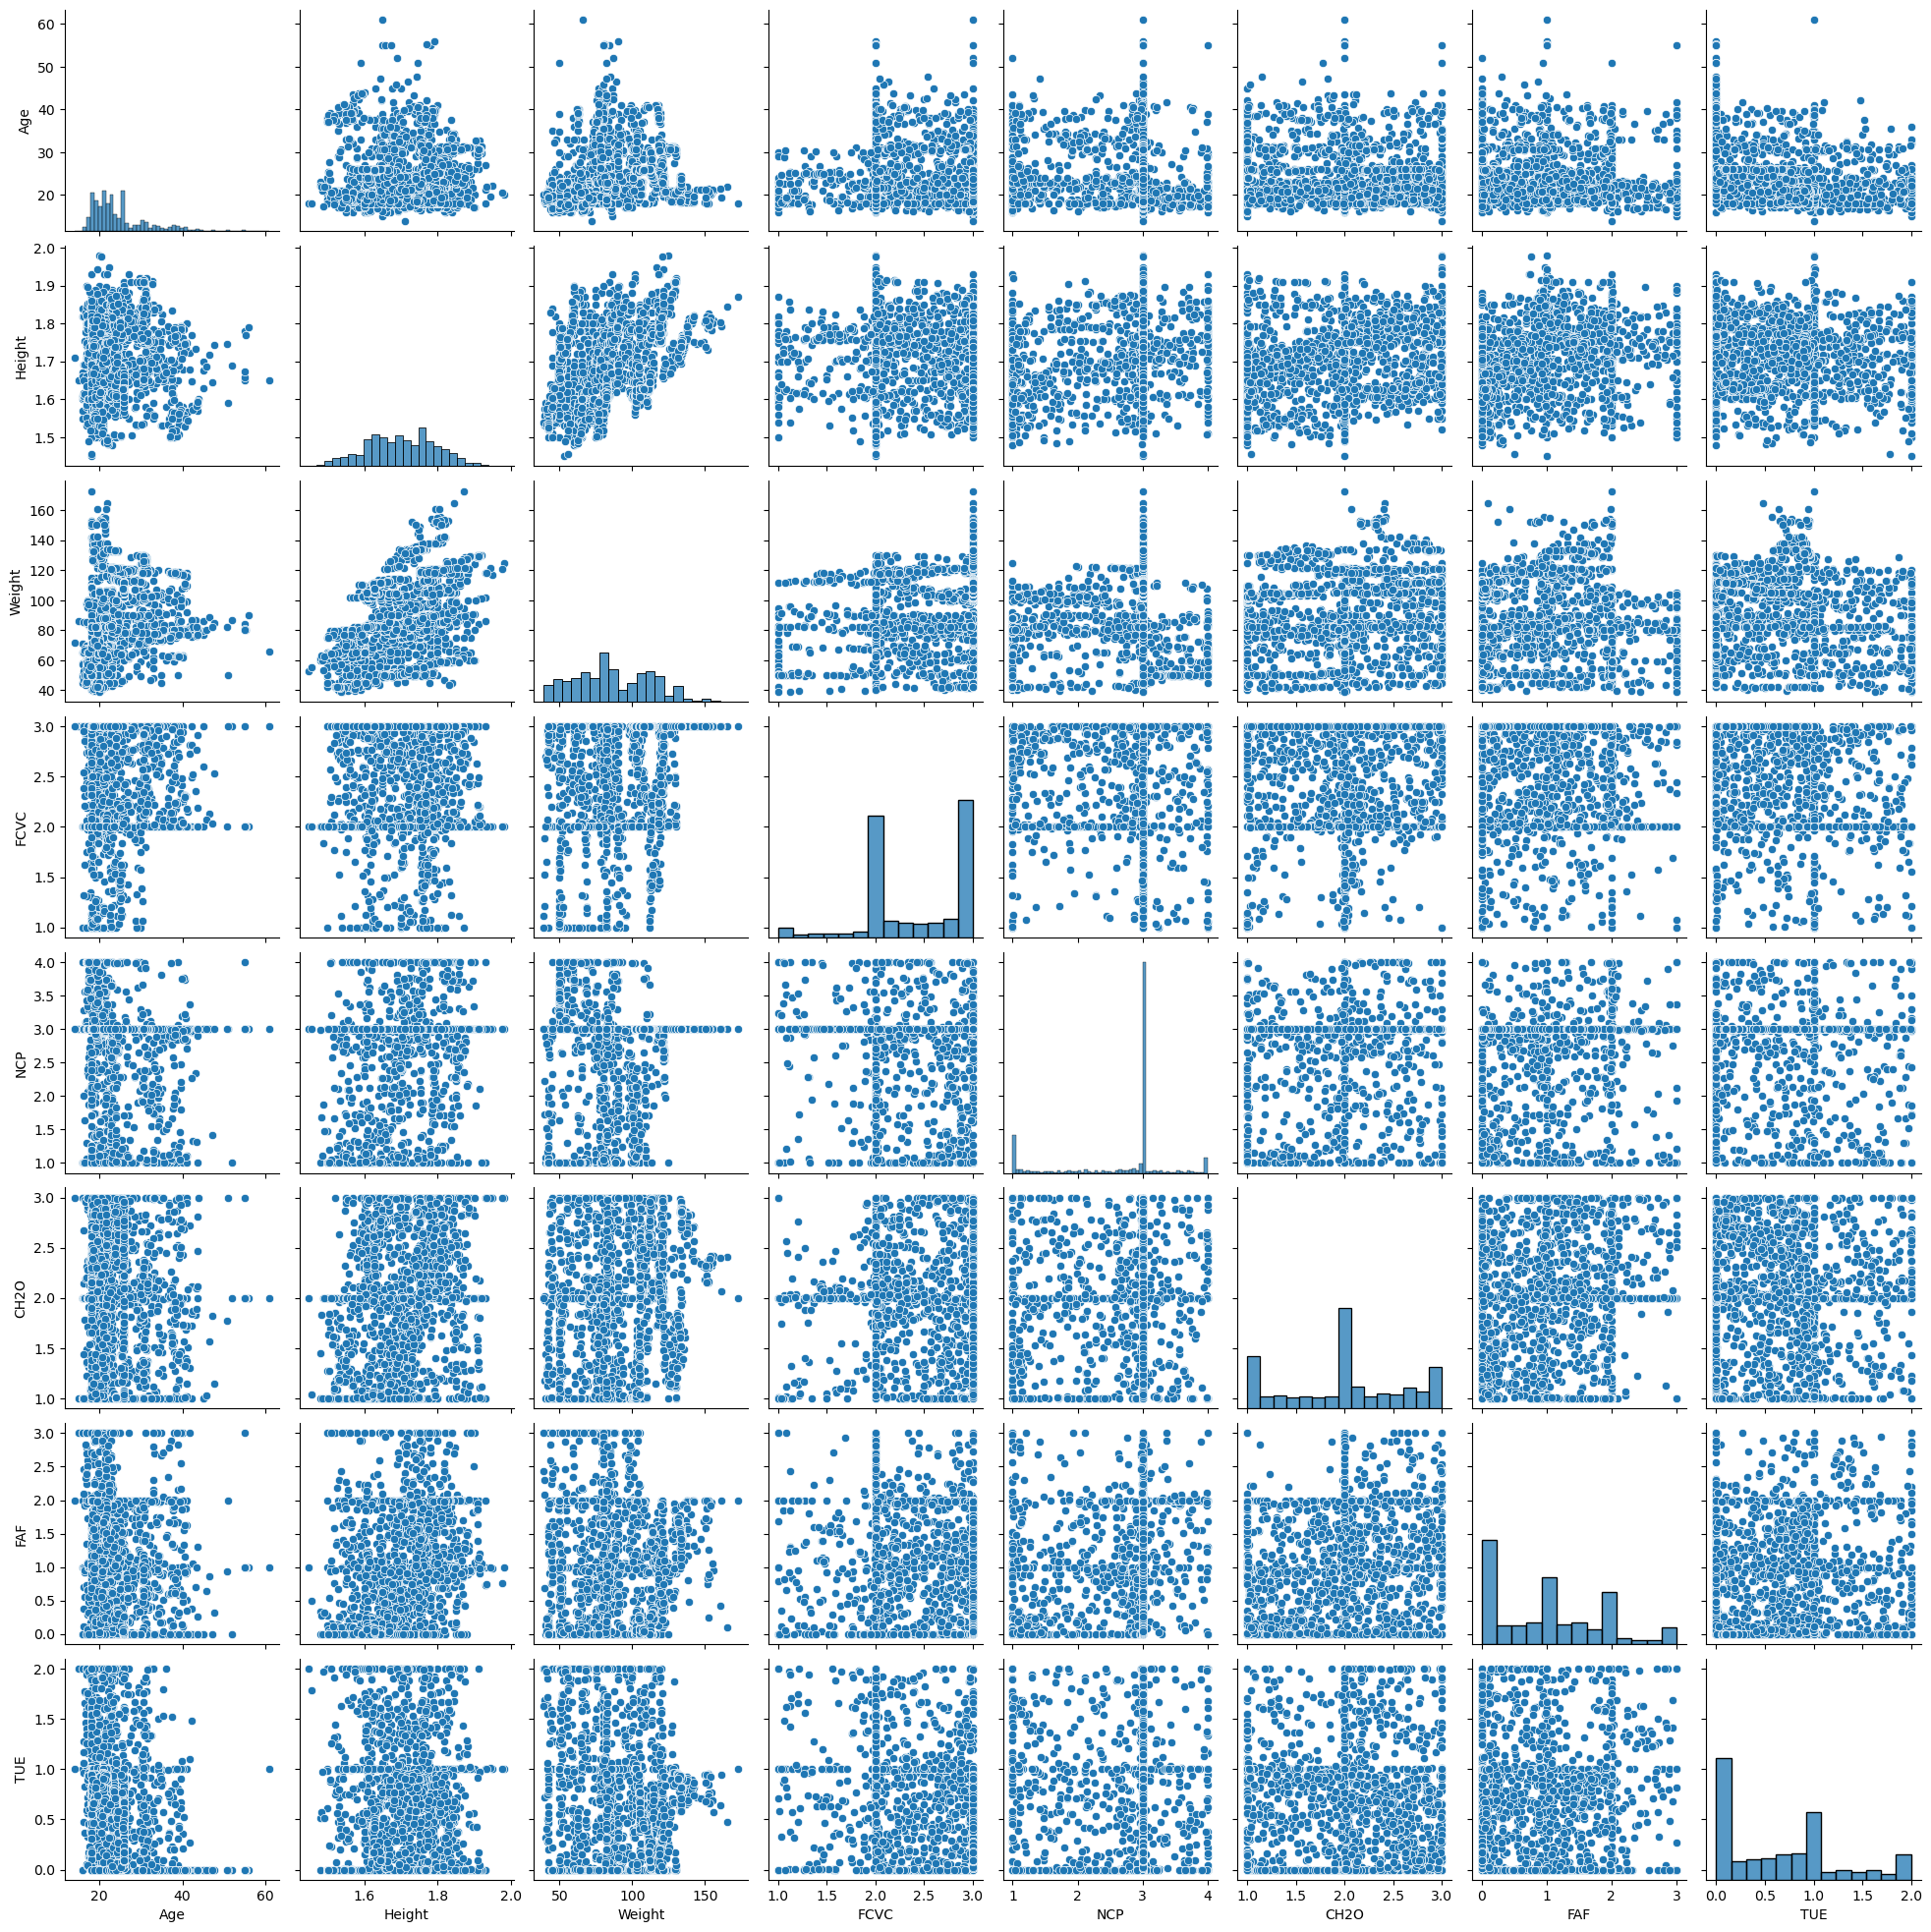

Confusion Matrix for Logistic Regression:
[[56  0  0  0  0  0  0]
 [ 9 39  0  0  0 11  3]
 [ 0  0 69  7  0  0  2]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 41 10]
 [ 0  0  3  0  0  5 42]]

Classification Report for Logistic Regression:
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      1.00      0.93        56
      Normal_Weight       0.89      0.63      0.74        62
     Obesity_Type_I       0.93      0.88      0.91        78
    Obesity_Type_II       0.89      0.97      0.93        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.72      0.73      0.73        56
Overweight_Level_II       0.74      0.84      0.79        50

           accuracy                           0.87       423
          macro avg       0.86      0.86      0.86       423
       weighted avg       0.87      0.87      0.86       423



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn import metrics



data = pd.read_csv("ObesityDataSet.csv")
data.head()
print(data.head())
print(data.describe())
sns.pairplot(data)
plt.show()

X = pd.get_dummies(data.drop('NObeyesdad', axis=1))
y = data['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)


y_pred_logistic = logistic_model.predict(X_test_scaled)

print("Confusion Matrix for Logistic Regression:")
print(metrics.confusion_matrix(y_test, y_pred_logistic))  
print("\nClassification Report for Logistic Regression:")
print(metrics.classification_report(y_test, y_pred_logistic))  


### 5. Train prediction models

### 6. Test prediction models and show results

### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

### 8. Describe appropriate recommendations

### 9. Reflect on what you have learned by completing this assignment

### 10. References